In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt
from datetime import timedelta, datetime, time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy.stats import entropy
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")


2025-02-10 21:50:02.363047: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 21:50:02.479949: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 21:50:02.611522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739238602.713200   15070 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739238602.736382   15070 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 21:50:02.937647: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
path = '/content/drive/MyDrive/Aviator/Odd_New.csv'
data = pd.read_csv(path)
print(data)

        Unnamed: 0     Odd  odd_entrada1  odd_entrada2  odd_entrada3  \
0                0    4.72          1.00          4.15          1.44   
1                1    3.68          4.72          1.00          4.15   
2                2  360.61          3.68          4.72          1.00   
3                3    1.55        360.61          3.68          4.72   
4                4    1.11          1.55        360.61          3.68   
...            ...     ...           ...           ...           ...   
999835      999835    1.71          6.76          1.48          1.73   
999836      999836    5.16          1.71          6.76          1.48   
999837      999837    1.23          5.16          1.71          6.76   
999838      999838    9.00          1.23          5.16          1.71   
999839      999839    2.26          9.00          1.23          5.16   

        odd_entrada4  odd_entrada5  odd_entrada6  odd_entrada7  odd_entrada8  \
0               1.00          1.00          1.62       

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [12]:
for i in range(0, len(data)):
  if data['Odd'][i] >= 2:
    data.loc[i,'Odd_Categoria'] = 1
  else:
    data.loc[i,'Odd_Categoria'] = 0

In [13]:
data1 = data

data = data[['Odd', 'Odd_Categoria', 'odd_entrada1', 'odd_entrada2', 'odd_entrada3',
       'odd_entrada4', 'odd_entrada5', 'odd_entrada6', 'odd_entrada7',
       'odd_entrada8', 'odd_entrada9', 'odd_entrada10', 'odd_entrada11',
       'odd_entrada12', 'odd_entrada13', 'odd_entrada14', 'odd_entrada15',
       'odd_entrada16', 'odd_entrada17', 'odd_entrada18', 'odd_entrada19',
       'odd_entrada20', 'odd_entrada21', 'odd_entrada22', 'odd_entrada23',
       'odd_entrada24', 'odd_entrada25', 'odd_entrada26', 'odd_entrada27',
       'odd_entrada28', 'odd_entrada29', 'odd_entrada30', 'odd_entrada31',
       'odd_entrada32', 'odd_entrada33', 'odd_entrada34', 'odd_entrada35',
       'odd_entrada36', 'odd_entrada37', 'odd_entrada38', 'odd_entrada39',
       'odd_entrada40', 'odd_entrada41', 'odd_entrada42', 'odd_entrada43',
       'odd_entrada44', 'odd_entrada45', 'odd_entrada46', 'odd_entrada47',
       'odd_entrada48', 'odd_entrada49', 'odd_entrada50', 'odd_entrada51',
       'odd_entrada52', 'odd_entrada53', 'odd_entrada54', 'odd_entrada55',
       'odd_entrada56', 'odd_entrada57', 'odd_entrada58', 'odd_entrada59',
       'odd_entrada60', 'odd_entrada61', 'odd_entrada62', 'odd_entrada63',
       'odd_entrada64', 'odd_entrada65', 'odd_entrada66', 'odd_entrada67',
       'odd_entrada68', 'odd_entrada69', 'odd_entrada70', 'odd_entrada71',
       'odd_entrada72', 'odd_entrada73', 'odd_entrada74', 'odd_entrada75',
       'odd_entrada76', 'odd_entrada77', 'odd_entrada78', 'odd_entrada79',
       'odd_entrada80', 'odd_entrada81', 'odd_entrada82', 'odd_entrada83',
       'odd_entrada84', 'odd_entrada85', 'odd_entrada86', 'odd_entrada87',
       'odd_entrada88', 'odd_entrada89', 'odd_entrada90', 'odd_entrada91',
       'odd_entrada92', 'odd_entrada93', 'odd_entrada94', 'odd_entrada95',
       'odd_entrada96', 'odd_entrada97', 'odd_entrada98', 'odd_entrada99',
       'odd_entrada100', 'odd_entrada101', 'odd_entrada102', 'odd_entrada103',
       'odd_entrada104', 'odd_entrada105', 'odd_entrada106', 'odd_entrada107',
       'odd_entrada108', 'odd_entrada109', 'odd_entrada110', 'odd_entrada111',
       'odd_entrada112', 'odd_entrada113', 'odd_entrada114', 'odd_entrada115',
       'odd_entrada116', 'odd_entrada117', 'odd_entrada118', 'odd_entrada119',
       'odd_entrada120', 'odd_entrada121', 'odd_entrada122', 'odd_entrada123',
       'odd_entrada124', 'odd_entrada125', 'odd_entrada126', 'odd_entrada127',
       'odd_entrada128', 'odd_entrada129', 'odd_entrada130', 'odd_entrada131',
       'odd_entrada132', 'odd_entrada133', 'odd_entrada134', 'odd_entrada135',
       'odd_entrada136', 'odd_entrada137', 'odd_entrada138', 'odd_entrada139',
       'odd_entrada140', 'odd_entrada141', 'odd_entrada142', 'odd_entrada143',
       'odd_entrada144']]
data.head()

,Odd,Odd_Categoria,odd_entrada1,odd_entrada2,odd_entrada3,odd_entrada4,odd_entrada5,odd_entrada6,odd_entrada7,odd_entrada8,...,odd_entrada135,odd_entrada136,odd_entrada137,odd_entrada138,odd_entrada139,odd_entrada140,odd_entrada141,odd_entrada142,odd_entrada143,odd_entrada144
0,4.72,1.0,1.00,4.15,1.44,1.00,1.00,1.62,1.63,24.34,...,1.74,2.14,1.18,2.51,4.08,1.22,4.96,14.10,1.59,13.73
1,3.68,1.0,4.72,1.00,4.15,1.44,1.00,1.00,1.62,1.63,...,1.16,1.74,2.14,1.18,2.51,4.08,1.22,4.96,14.10,1.59
2,360.61,1.0,3.68,4.72,1.00,4.15,1.44,1.00,1.00,1.62,...,8.55,1.16,1.74,2.14,1.18,2.51,4.08,1.22,4.96,14.10
3,1.55,0.0,360.61,3.68,4.72,1.00,4.15,1.44,1.00,1.00,...,1.58,8.55,1.16,1.74,2.14,1.18,2.51,4.08,1.22,4.96
4,1.11,0.0,1.55,360.61,3.68,4.72,1.00,4.15,1.44,1.00,...,1.13,1.58,8.55,1.16,1.74,2.14,1.18,2.51,4.08,1.22


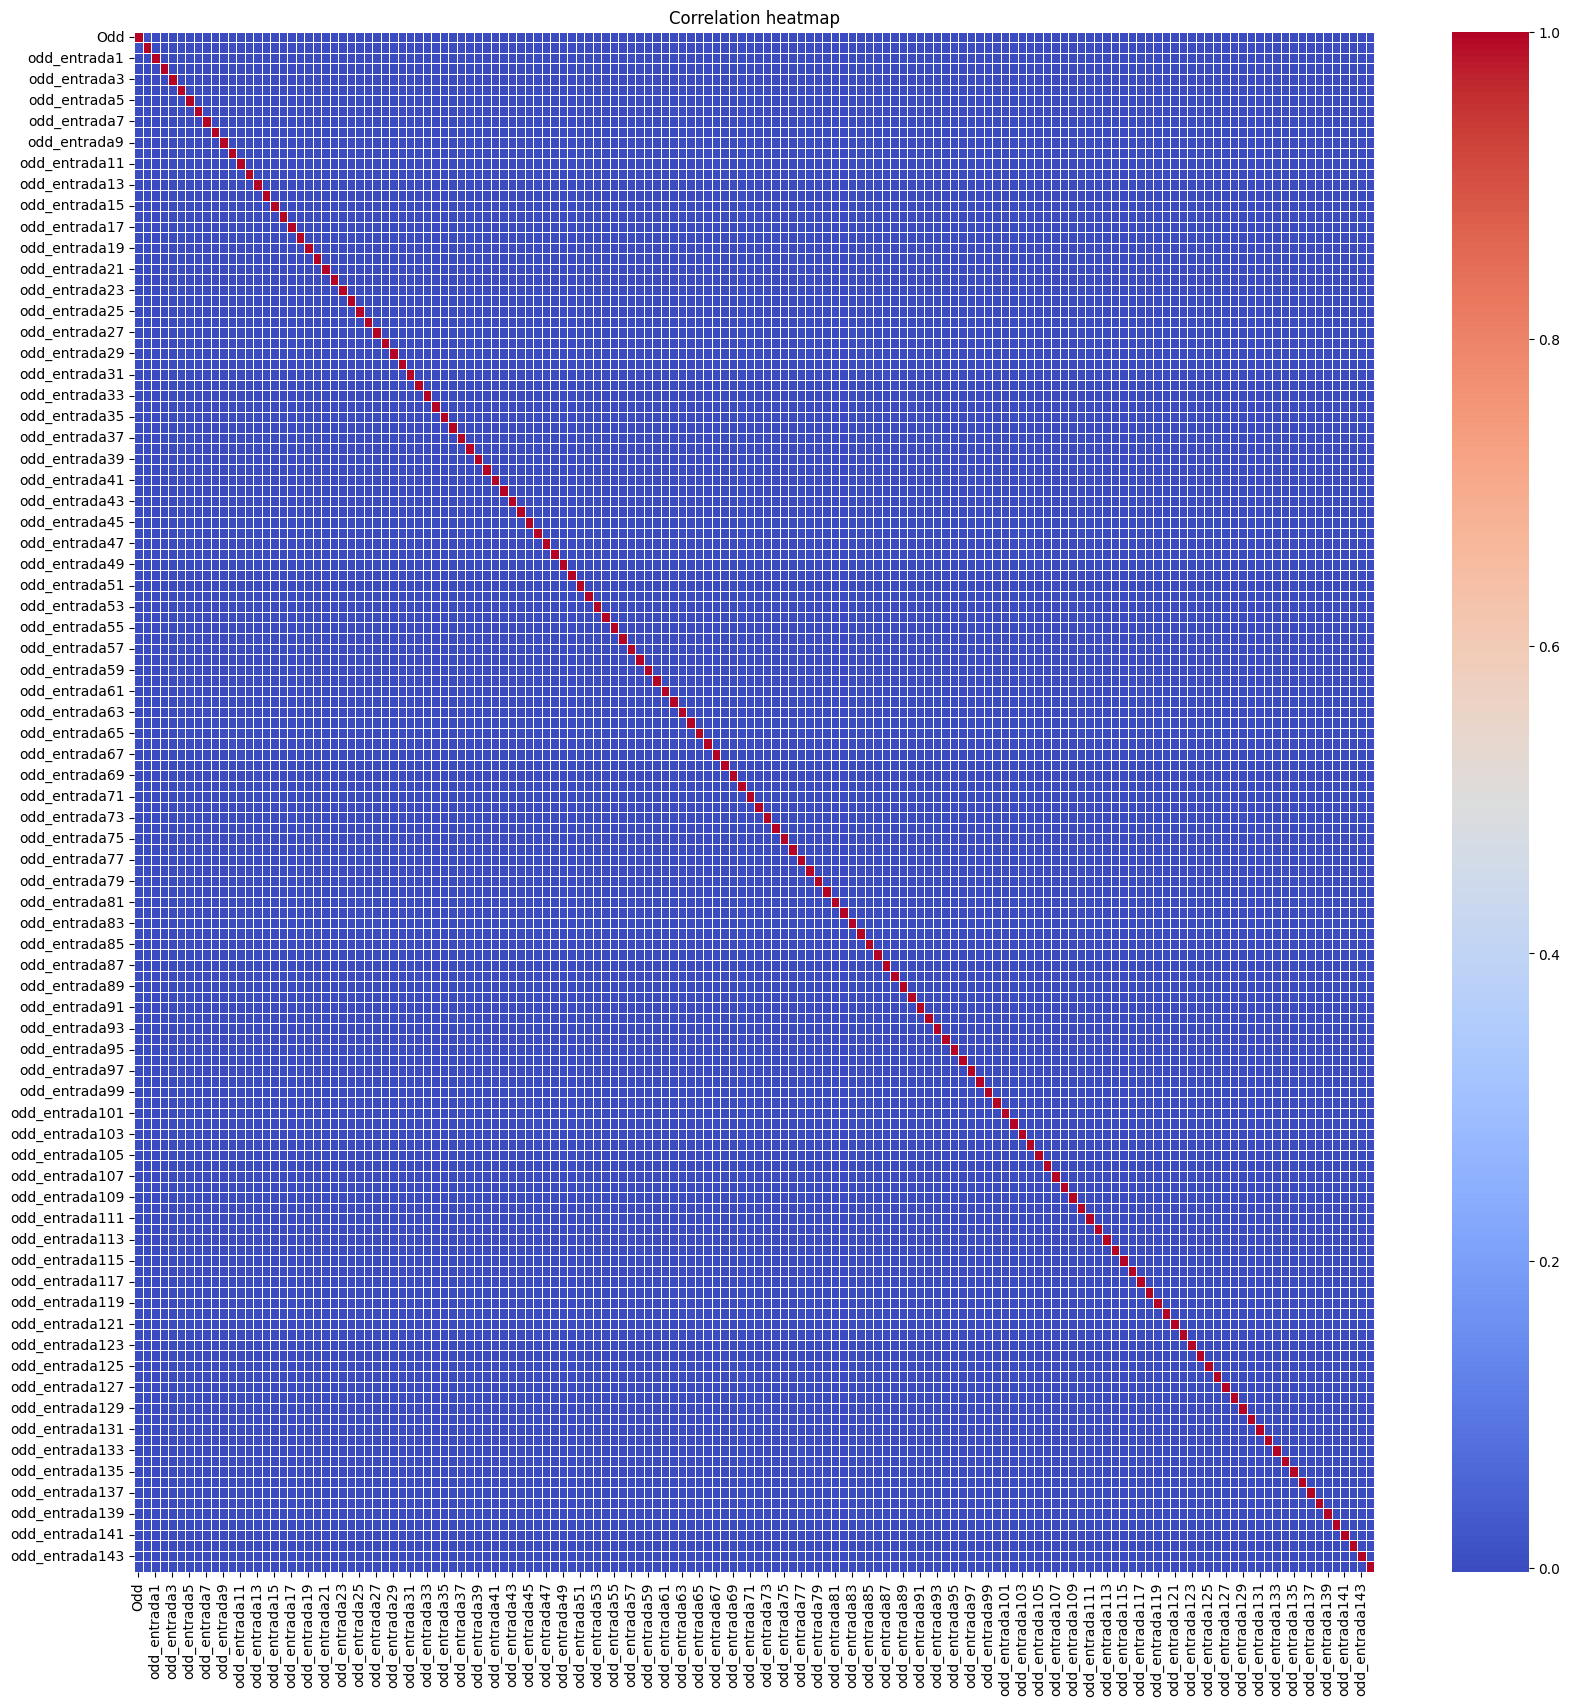

In [8]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

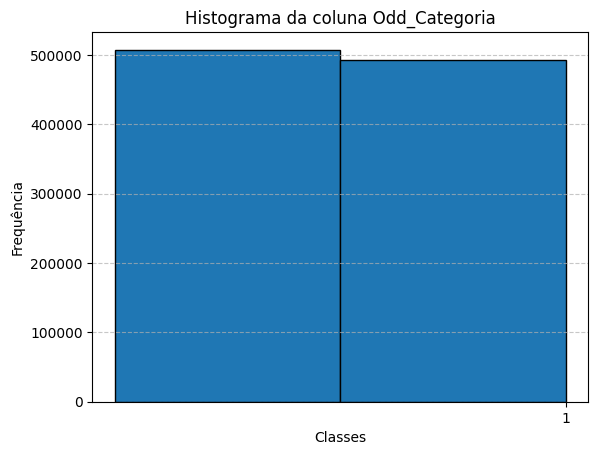

In [14]:
# Configurar o histograma
plt.hist(data['Odd_Categoria'], bins=2, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna Odd_Categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 2))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


In [15]:
data.columns

Index(['Odd', 'Odd_Categoria', 'odd_entrada1', 'odd_entrada2', 'odd_entrada3',
       'odd_entrada4', 'odd_entrada5', 'odd_entrada6', 'odd_entrada7',
       'odd_entrada8',
       ...
       'odd_entrada135', 'odd_entrada136', 'odd_entrada137', 'odd_entrada138',
       'odd_entrada139', 'odd_entrada140', 'odd_entrada141', 'odd_entrada142',
       'odd_entrada143', 'odd_entrada144'],
      dtype='object', length=146)

In [16]:
# Separar recursos (X) e rótulos (y)
X1 = data[['odd_entrada1', 'odd_entrada2', 'odd_entrada3',
       'odd_entrada4', 'odd_entrada5', 'odd_entrada6', 'odd_entrada7',
       'odd_entrada8', 'odd_entrada9', 'odd_entrada10', 'odd_entrada11',
       'odd_entrada12', 'odd_entrada13', 'odd_entrada14', 'odd_entrada15',
       'odd_entrada16', 'odd_entrada17', 'odd_entrada18', 'odd_entrada19',
       'odd_entrada20', 'odd_entrada21', 'odd_entrada22', 'odd_entrada23',
       'odd_entrada24', 'odd_entrada25', 'odd_entrada26', 'odd_entrada27',
       'odd_entrada28', 'odd_entrada29', 'odd_entrada30', 'odd_entrada31',
       'odd_entrada32', 'odd_entrada33', 'odd_entrada34', 'odd_entrada35',
       'odd_entrada36', 'odd_entrada37', 'odd_entrada38', 'odd_entrada39',
       'odd_entrada40', 'odd_entrada41', 'odd_entrada42', 'odd_entrada43',
       'odd_entrada44', 'odd_entrada45', 'odd_entrada46', 'odd_entrada47',
       'odd_entrada48', 'odd_entrada49', 'odd_entrada50', 'odd_entrada51',
       'odd_entrada52', 'odd_entrada53', 'odd_entrada54', 'odd_entrada55',
       'odd_entrada56', 'odd_entrada57', 'odd_entrada58', 'odd_entrada59',
       'odd_entrada60', 'odd_entrada61', 'odd_entrada62', 'odd_entrada63',
       'odd_entrada64', 'odd_entrada65', 'odd_entrada66', 'odd_entrada67',
       'odd_entrada68', 'odd_entrada69', 'odd_entrada70', 'odd_entrada71',
       'odd_entrada72', 'odd_entrada73', 'odd_entrada74', 'odd_entrada75',
       'odd_entrada76', 'odd_entrada77', 'odd_entrada78', 'odd_entrada79',
       'odd_entrada80', 'odd_entrada81', 'odd_entrada82', 'odd_entrada83',
       'odd_entrada84', 'odd_entrada85', 'odd_entrada86', 'odd_entrada87',
       'odd_entrada88', 'odd_entrada89', 'odd_entrada90', 'odd_entrada91',
       'odd_entrada92', 'odd_entrada93', 'odd_entrada94', 'odd_entrada95',
       'odd_entrada96', 'odd_entrada97', 'odd_entrada98', 'odd_entrada99',
       'odd_entrada100', 'odd_entrada101', 'odd_entrada102', 'odd_entrada103',
       'odd_entrada104', 'odd_entrada105', 'odd_entrada106', 'odd_entrada107',
       'odd_entrada108', 'odd_entrada109', 'odd_entrada110', 'odd_entrada111',
       'odd_entrada112', 'odd_entrada113', 'odd_entrada114', 'odd_entrada115',
       'odd_entrada116', 'odd_entrada117', 'odd_entrada118', 'odd_entrada119',
       'odd_entrada120', 'odd_entrada121', 'odd_entrada122', 'odd_entrada123',
       'odd_entrada124', 'odd_entrada125', 'odd_entrada126', 'odd_entrada127',
       'odd_entrada128', 'odd_entrada129', 'odd_entrada130', 'odd_entrada131',
       'odd_entrada132', 'odd_entrada133', 'odd_entrada134', 'odd_entrada135',
       'odd_entrada136', 'odd_entrada137', 'odd_entrada138', 'odd_entrada139',
       'odd_entrada140', 'odd_entrada141', 'odd_entrada142', 'odd_entrada143',
       'odd_entrada144']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

In [38]:

def matriz(num_linhas, array):
    """
    Transforma um array unidimensional em uma matriz organizada por colunas.
    
    Args:
        array (list ou np.array): Lista de números a serem organizados.
        num_linhas (int): Número de linhas desejadas na matriz.

    Returns:
        np.array: Matriz ordenada.
    """
    
    # Reshape para matriz (por linha) e depois transpõe para organizar por colunas
    matriz = np.array(array).reshape(-1, num_linhas).T
    
    return matriz # Retorna como lista para melhor legibilidade

data = pd.read_csv("/home/darkcover/Documentos/Out/dados/odds_200k.csv")
array_binario = []
array_float = []

for i in range(600):
    if data['Odd'][i] >= 4:
        trick1 = 4
    else:
        if data['Odd'][i] == 0:
            trick1 = 1
        else:
            trick1 = data['Odd'][i]
    
    array_float.append(trick1)

    if data['Odd'][i] >= 2:
        trick2 = 1
    else:
        trick2 = 0
    
    array_binario.append(trick2)

matriz_float = matriz(60, array_float)
matriz_binaria = matriz(60, array_binario)

matriz_entrada = matriz_float[:,:(matriz_float.shape[1] - 1)]
matriz_saida = matriz_binaria[:,-1]

print(matriz_binaria)
print(matriz_float)

print(matriz_entrada)
print(matriz_saida)

X1 = matriz_entrada 
y1 = matriz_saida

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

[[1 1 0 0 0 1 0 0 1 1]
 [1 1 1 0 0 1 1 1 0 0]
 [1 0 0 1 1 0 1 1 0 1]
 [0 0 1 0 1 0 1 1 1 1]
 [0 0 1 0 0 0 0 1 1 0]
 [1 0 0 0 1 1 0 1 1 1]
 [0 1 1 0 0 1 1 1 0 1]
 [0 0 0 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 1 0 0]
 [1 1 1 1 0 0 1 1 1 0]
 [0 0 1 0 0 0 1 0 1 1]
 [0 1 1 0 0 0 1 1 1 0]
 [1 0 1 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 1 1 0 0]
 [1 0 1 1 1 1 1 0 1 1]
 [1 0 0 0 1 0 1 1 0 1]
 [0 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 1 1]
 [0 0 1 1 0 0 0 0 1 0]
 [0 1 1 0 1 0 0 0 0 1]
 [1 1 0 1 0 1 1 0 1 0]
 [1 1 1 0 1 0 0 0 1 1]
 [0 0 1 1 1 0 0 0 1 1]
 [0 1 0 0 1 1 0 0 0 0]
 [0 1 0 1 1 0 1 0 0 0]
 [0 1 0 1 1 0 0 0 0 1]
 [0 1 1 0 1 0 1 0 0 0]
 [1 1 0 0 1 1 1 0 0 1]
 [1 0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 1 1 1 1 1]
 [1 0 0 1 1 0 1 1 0 1]
 [0 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 0 0 1 1 1 0 1 0 0]
 [0 1 0 1 0 1 0 1 1 0]
 [1 0 0 1 0 0 1 1 0 1]
 [1 1 1 0 1 1 1 1 1 0]
 [0 1 0 0 1 1 1 1 0 1]
 [1 0 1 1 0 1 1 0 1 0]
 [1 0 0 1 1 0 0 0 1 1]
 [1 1 1 1 1 0 0 1 1 1]
 [1 1 0 0 0

In [39]:
# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Crie uma instância do GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Execute a pesquisa de grade no conjunto de treinamento
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

# Calcular o F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo: {f1}')

Acurácia do modelo: 0.5833333333333334
F1-Score do modelo: 0.6008403361344538


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Crie um modelo de Regressão Linear
model = LinearRegression()

# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exiba as métricas de desempenho
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R^2): {r2}')


Erro Quadrático Médio (MSE): 0.2030078944877672
Coeficiente de Determinação (R^2): -0.08270877060142512


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R^2):", r2)


Erro Quadrático Médio (MSE): 0.3333333333333333
Coeficiente de Determinação (R^2): -0.7777777777777777


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Criar um modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Treinar o modelo no conjunto de treinamento
random_forest.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R^2):", r2)


Erro Quadrático Médio (MSE): 0.2219226666666667
Coeficiente de Determinação (R^2): -0.18358755555555573


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# Treinando um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.75


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# Treinando um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.10936109361093611


In [ ]:
#data = data1
data

,Odd_ajustada,hora,minutos,segundos,horario,entrada_horario,Odd_Categoria,odd_eentrada,odd_categoria_media_movel5,odd_categoria_media_movel10,...,tendencia_media_movel10,categoria_frequencia20,entropia_rolling5,entropia_rolling320,correlacao_odd_categoria_media_movel10,correlacao_odd_categoria_media_movel640,categoria_contagem,variancia_rolling10,variancia_rolling20,variancia_rolling320
0,3.39,0,28,42,Sat May 27 00:28:42 2023,2023-05-27 00:28:18,8,4.0,6.114502,6.114525,...,-0.000027,6.275558,1.362456,2.375266,0.300776,0.039734,3067,9.519489,9.513725,9.538557
1,1.27,0,28,56,Sat May 27 00:28:56 2023,2023-05-27 00:28:42,3,8.0,6.114502,6.114525,...,0.000000,6.275558,1.362456,2.375266,0.300776,0.039734,3649,9.519489,9.513725,9.538557
2,5.16,0,29,26,Sat May 27 00:29:26 2023,2023-05-27 00:28:56,10,3.0,6.114502,6.114525,...,0.000000,6.275558,1.362456,2.375266,0.300776,0.039734,3687,9.519489,9.513725,9.538557
3,2.65,0,29,50,Sat May 27 00:29:50 2023,2023-05-27 00:29:26,8,10.0,6.114502,6.114525,...,0.000000,6.275558,1.362456,2.375266,0.300776,0.039734,3649,9.519489,9.513725,9.538557
4,1.00,0,30,3,Sat May 27 00:30:03 2023,2023-05-27 00:29:50,1,8.0,6.600000,6.114525,...,0.000000,6.275558,1.332179,2.375266,0.300776,0.039734,3649,9.519489,9.513725,9.538557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37850,1.53,23,0,27,Fri Oct 20 23:00:27 2023,2023-10-20 23:00:09,5,11.0,6.200000,6.200000,...,0.600000,6.000000,1.609438,2.377045,0.553334,0.012800,3447,11.288889,8.957895,9.492006
37851,1.36,23,0,45,Fri Oct 20 23:00:45 2023,2023-10-20 23:00:27,4,5.0,6.000000,6.000000,...,-0.200000,6.000000,1.609438,2.377129,0.655163,0.013646,3685,11.333333,8.365789,9.468613
37852,1.00,23,0,59,Fri Oct 20 23:00:59 2023,2023-10-20 23:00:45,1,4.0,6.000000,5.300000,...,-0.700000,6.000000,1.609438,2.375092,0.685679,0.013202,3067,8.455556,7.839474,9.448580
37853,2.17,23,1,20,Fri Oct 20 23:01:20 2023,2023-10-20 23:00:59,7,1.0,6.000000,5.000000,...,-0.300000,5.000000,1.609438,2.376126,0.758783,0.014183,2969,10.222222,8.852632,9.511560


In [ ]:
data = data2

NameError: ignored

In [ ]:
array = pd.array(data['odd_eentrada'])

In [ ]:
array1 = array[1:]
array2 = array[2:]
array3 = array[3:]
array4 = array[4:]
array5 = array[5:]
array6 = array[6:]
array7 = array[7:]
array8 = array[8:]
array9 = array[9:]
array10 = array[10:]

In [ ]:
print(len(data),len(array1),len(array2),len(array3),len(array4),len(array5),len(array6),len(array7),len(array8),len(array9),len(array10))

37856 37855 37854 37853 37852 37851 37850 37849 37848 37847 37846


In [ ]:
array1 = array1[9:]
array2 = array2[8:]
array3 = array3[7:]
array4 = array4[6:]
array5 = array5[5:]
array6 = array6[4:]
array7 = array7[3:]
array8 = array8[2:]
array9 = array9[1:]

In [ ]:
print(len(data),len(array1),len(array2),len(array3),len(array4),len(array5),len(array6),len(array7),len(array8),len(array9),len(array10))

37856 37846 37846 37846 37846 37846 37846 37846 37846 37846 37846


In [ ]:
data = data.iloc[10:].reset_index(drop=True)
print(len(data))

37846


In [ ]:
array1 = pd.DataFrame({'1entrada-anterior': array1})
array2 = pd.DataFrame({'2entrada-anterior': array2})
array3 = pd.DataFrame({'3entrada-anterior': array3})
array4 = pd.DataFrame({'4entrada-anterior': array4})
array5 = pd.DataFrame({'5entrada-anterior': array5})
array6 = pd.DataFrame({'6entrada-anterior': array6})
array7 = pd.DataFrame({'7entrada-anterior': array7})
array8 = pd.DataFrame({'8entrada-anterior': array8})
array9 = pd.DataFrame({'9entrada-anterior': array9})
array10 = pd.DataFrame({'10entrada-anterior': array10})

In [ ]:
data = pd.concat([data, array1, array2, array3, array4, array5, array6, array7, array8, array9, array10], axis = 1)

In [ ]:
data.columns

Index(['Odd_ajustada', 'hora', 'minutos', 'segundos', 'horario',
       'Odd_Categoria', 'odd_eentrada', 'odd_categoria_media_movel5',
       'odd_categoria_media_movel10', 'odd_categoria_media_movel20',
       'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
       'odd_categoria_media_movel160', 'odd_categoria_media_movel320',
       'odd_categoria_media_movel640', 'odd_mediana20', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
       'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],

In [ ]:
data3 = data
data

,Odd_ajustada,hora,minutos,segundos,horario,Odd_Categoria,odd_eentrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,3.62,0,31,45,Sat May 27 00:31:45 2023,9,8.0,5.2,5.9,6.114619,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
1,6.50,0,32,18,Sat May 27 00:32:18 2023,10,9.0,6.8,6.4,6.114619,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,1.13,0,32,31,Sat May 27 00:32:31 2023,2,10.0,7.6,6.6,6.114619,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1.98,0,32,50,Sat May 27 00:32:50 2023,6,2.0,6.8,6.5,6.114619,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.16,0,33,4,Sat May 27 00:33:04 2023,3,6.0,7.0,6.1,6.114619,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37841,1.53,23,0,27,Fri Oct 20 23:00:27 2023,5,11.0,6.2,6.2,5.300000,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
37842,1.36,23,0,45,Fri Oct 20 23:00:45 2023,4,5.0,6.0,6.0,5.450000,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
37843,1.00,23,0,59,Fri Oct 20 23:00:59 2023,1,4.0,6.0,5.3,5.550000,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
37844,2.17,23,1,20,Fri Oct 20 23:01:20 2023,7,1.0,6.0,5.0,5.300000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
array = pd.array(data['odd_eentrada'])

array1 = array[1:]
array2 = array[2:]
array3 = array[3:]
array4 = array[4:]
array5 = array[5:]
array6 = array[6:]
array7 = array[7:]
array8 = array[8:]
array9 = array[9:]
array10 = array[10:]

print(len(data),len(array1),len(array2),len(array3),len(array4),len(array5),len(array6),len(array7),len(array8),len(array9),len(array10))

data = data.iloc[10:].reset_index(drop=True)
print(len(data))


array1 = pd.DataFrame({'1entrada-anterior': array1})
array2 = pd.DataFrame({'2entrada-anterior': array2})
array3 = pd.DataFrame({'3entrada-anterior': array3})
array4 = pd.DataFrame({'4entrada-anterior': array4})
array5 = pd.DataFrame({'5entrada-anterior': array5})
array6 = pd.DataFrame({'6entrada-anterior': array6})
array7 = pd.DataFrame({'7entrada-anterior': array7})
array8 = pd.DataFrame({'8entrada-anterior': array8})
array9 = pd.DataFrame({'9entrada-anterior': array9})
array10 = pd.DataFrame({'10entrada-anterior': array10})

data = pd.concat([data, array1, array2, array3, array4, array5, array6, array7, array8, array9, array10], axis = 1)

37845 37844 37843 37842 37841 37840 37839 37838 37837 37836 37835
37835


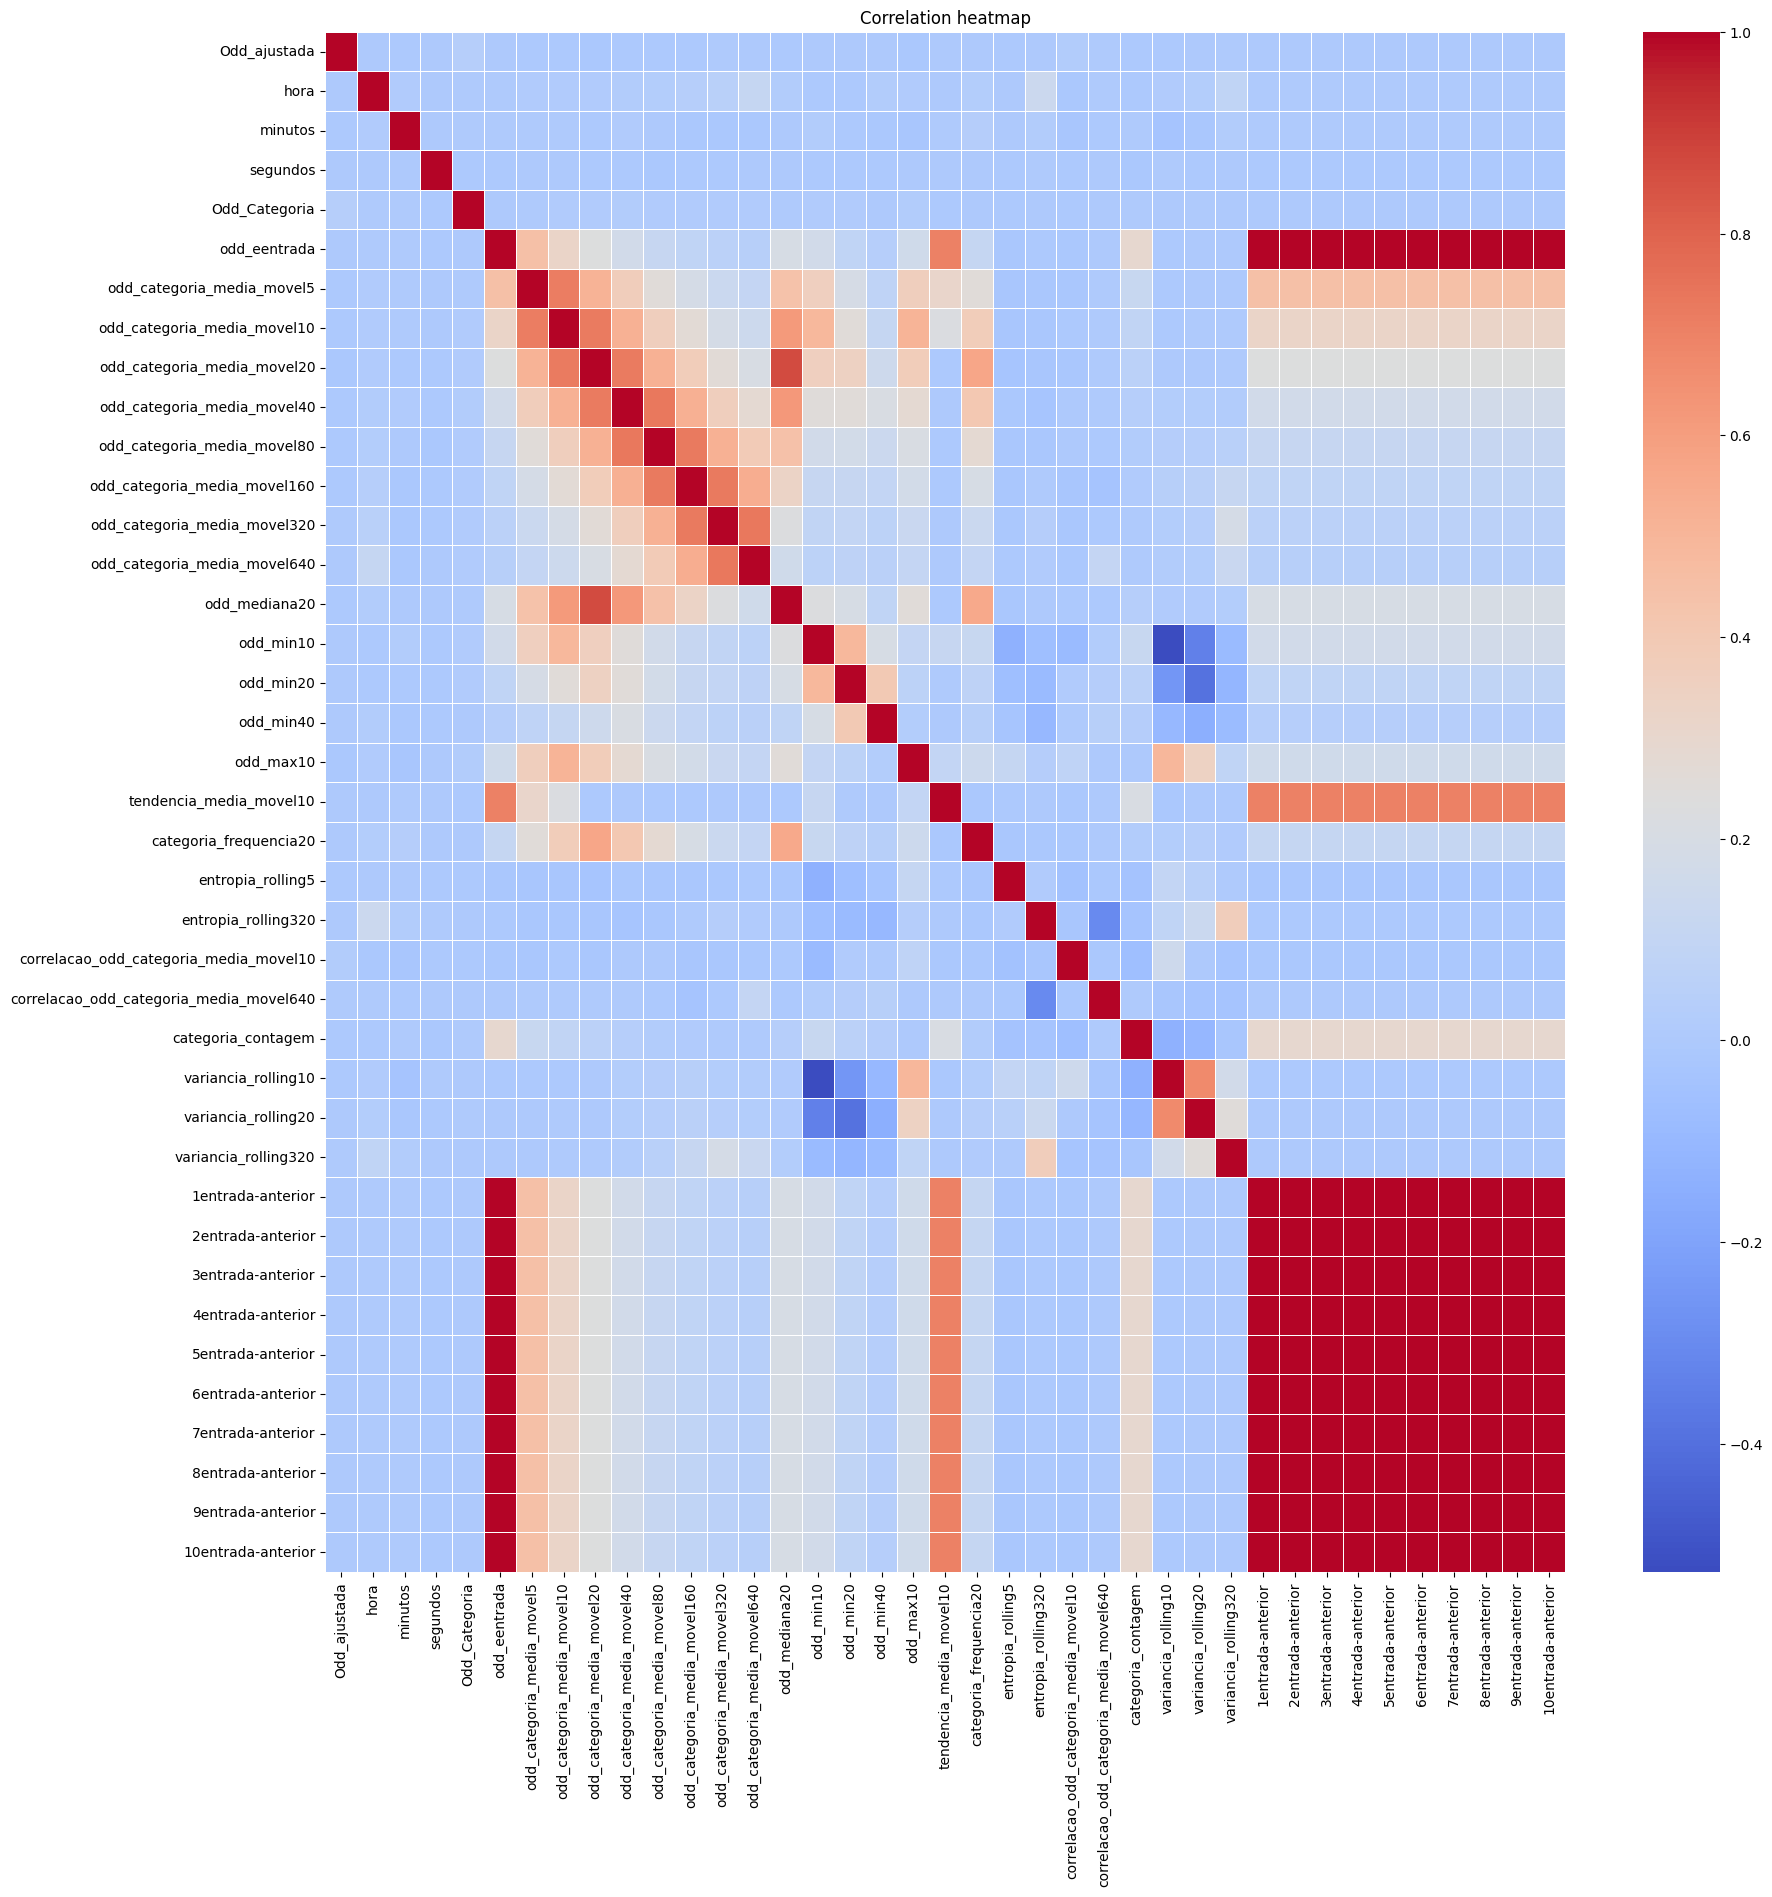

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
data.columns

Index(['Unnamed: 0', 'Odd', 'Odd_Categoria', 'odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],
      dtype='object')

In [ ]:
data3 = data

In [ ]:
data = data3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = data.tail(250000).reset_index(drop=True)


In [ ]:
data

,Odd_ajustada,hora,minutos,segundos,horario,Odd_Categoria,odd_eentrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,3.62,0,31,45,Sat May 27 00:31:45 2023,9,8.0,5.2,5.9,6.114619,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
1,6.50,0,32,18,Sat May 27 00:32:18 2023,10,9.0,6.8,6.4,6.114619,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,1.13,0,32,31,Sat May 27 00:32:31 2023,2,10.0,7.6,6.6,6.114619,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1.98,0,32,50,Sat May 27 00:32:50 2023,6,2.0,6.8,6.5,6.114619,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.16,0,33,4,Sat May 27 00:33:04 2023,3,6.0,7.0,6.1,6.114619,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37841,1.53,23,0,27,Fri Oct 20 23:00:27 2023,5,11.0,6.2,6.2,5.300000,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
37842,1.36,23,0,45,Fri Oct 20 23:00:45 2023,4,5.0,6.0,6.0,5.450000,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
37843,1.00,23,0,59,Fri Oct 20 23:00:59 2023,1,4.0,6.0,5.3,5.550000,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
37844,2.17,23,1,20,Fri Oct 20 23:01:20 2023,7,1.0,6.0,5.0,5.300000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
data['Odd_Categoria'].describe()

count    250000.000000
mean          6.251320
std           3.047642
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          11.000000
Name: Odd_Categoria, dtype: float64

In [ ]:
data = data[['Odd_Categoria','odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320']]

In [ ]:
unique_classes = data['Odd_Categoria'].unique()
print(unique_classes)

[ 7  4  2  8 10  6 11  5  9  1  3]


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [ ]:
import numpy as np

class PolicyGradient:

    def __init__(self, n_actions, learning_rate=0.05):
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.policy = np.ones((n_actions,)) / n_actions

    def get_action(self, state):
        return np.random.choice(self.n_actions, p=self.policy)

    def update_policy(self, state, action, reward):
        old_policy_value = self.policy[action]

        # Atualiza a política usando o gradiente da recompensa esperada
        self.policy[action] += self.learning_rate * reward

        # Normaliza as probabilidades para garantir que somem a 1
        self.policy /= np.sum(self.policy)

    def train(self, states, actions, rewards):
        for state, action, reward in zip(states, actions, rewards):
            self.update_policy(state, action, reward)

    def predict(self, state):
        return self.get_action(state)


def main():
    # Recursos (variáveis de entrada)
    features = data[['odd_eentrada', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
                     'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
                     'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
                     'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
                     'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
                     'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640',
                     'categoria_contagem', 'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
                     '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior',
                     '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior',
                     '9entrada-anterior', '10entrada-anterior']].values

    # Recompensas (variável de saída)
    rewards = data['Odd_Categoria'].values

    # Cria o modelo de política
    n_actions = 11  # Defina o número apropriado de ações com base no seu problema
    policy_gradient = PolicyGradient(n_actions)

    # Treina o modelo de política
    states = np.arange(len(features))  # Gere estados simples
    actions = [policy_gradient.get_action(state) for state in states]

    policy_gradient.train(states, actions, rewards)

    # Testa o modelo de política
    predictions = [policy_gradient.predict(state) for state in states]

    # Calcula a precisão do modelo de política
    accuracy = np.mean(predictions == rewards)

    print("Precisão:", accuracy)

if __name__ == "__main__":
    main()


Precisão: 0.08634994451196956


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def state_to_index(state, n_states):
    state_hash = hash(tuple(state))
    index = state_hash % n_states
    return index

class QTable:

    def __init__(self, n_states, n_actions, learning_rate):
        self.q_table = np.zeros((n_states, n_actions))
        self.learning_rate = learning_rate

    def get_action(self, state, epsilon):
        if np.random.random() < epsilon:
            return np.random.choice(self.q_table.shape[1])
        else:
            index = state_to_index(state, self.q_table.shape[0])
            return np.argmax(self.q_table[index, :])

    def update(self, state, action, reward, next_state, gamma):
        index = state_to_index(state, self.q_table.shape[0])
        next_index = state_to_index(next_state, self.q_table.shape[0])
        max_next_q = np.max(self.q_table[next_index, :])
        self.q_table[index, action] += self.learning_rate * (reward + gamma * max_next_q - self.q_table[index, action])

class QLearningAgent:

    def __init__(self, n_states, n_actions, learning_rate, gamma, epsilon):
        self.q_table = QTable(n_states, n_actions, learning_rate)
        self.gamma = gamma
        self.epsilon = epsilon

    def act(self, state):
        return self.q_table.get_action(state, self.epsilon)

    def learn(self, state, action, reward, next_state):
        self.q_table.update(state, action, reward, next_state, self.gamma)

def main():

    # Recursos (variáveis de entrada)
    features = data[['odd_eentrada', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
                     'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
                     'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
                     'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
                     'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
                     'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640',
                     'categoria_contagem', 'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
                     '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior',
                     '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior',
                     '9entrada-anterior', '10entrada-anterior']].values

    # Recompensas (variável de saída)
    rewards = data['Odd_Categoria'].values

    # Separe os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(features, rewards, test_size=0.2, random_state=42)

    # Crie o agente
    n_states = X_train.shape[1]
    n_actions = len(data['Odd_Categoria'].unique())
    q_agent = QLearningAgent(n_states, n_actions, 0.3, 0.9, 0.2)

    # Treine o agente
    for i in range(len(X_train) - 1):
        state = X_train[i, :]  # Ajuste para selecionar a linha diretamente em vez de usar .iloc
        action = q_agent.act(state)
        reward = y_train[i]
        next_state = X_train[i + 1, :]  # Ajuste para selecionar a linha diretamente em vez de usar .iloc
        q_agent.learn(state, action, reward, next_state)

    # Teste o agente
    predictions = []
    for i in range(len(X_test)):
        state = X_test[i, :]  # Ajuste para selecionar a linha diretamente em vez de usar .iloc
        action = q_agent.act(state)
        predictions.append(action)

    # Calcule a precisão
    accuracy = np.mean(predictions == y_test)

    print("Precisão:", accuracy)

if __name__ == "__main__":
    main()


Precisão: 0.08295904887714663


In [ ]:
data

,Odd_Categoria,odd_eentrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,9,8.0,5.2,5.9,6.114619,6.114991,6.115094,6.114912,6.114277,6.113808,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
1,10,9.0,6.8,6.4,6.114619,6.114991,6.115094,6.114912,6.114277,6.113808,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,2,10.0,7.6,6.6,6.114619,6.114991,6.115094,6.114912,6.114277,6.113808,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,6,2.0,6.8,6.5,6.114619,6.114991,6.115094,6.114912,6.114277,6.113808,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,3,6.0,7.0,6.1,6.114619,6.114991,6.115094,6.114912,6.114277,6.113808,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37841,5,11.0,6.2,6.2,5.300000,5.150000,5.712500,5.750000,5.862500,6.073437,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
37842,4,5.0,6.0,6.0,5.450000,5.150000,5.650000,5.762500,5.868750,6.064063,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
37843,1,4.0,6.0,5.3,5.550000,5.150000,5.625000,5.781250,5.853125,6.064063,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
37844,7,1.0,6.0,5.0,5.300000,5.075000,5.600000,5.731250,5.843750,6.054688,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

class DQNAgent:

    def __init__(self, n_states, n_actions, learning_rate, gamma, epsilon):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

        # Crie a rede neural
        self.model = self.build_model()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.n_states,)),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(self.n_actions)
        ])
        return model

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            q_values = self.model.predict(state.reshape(1, -1))
            return np.argmax(q_values)

    def learn(self, state, action, reward, next_state):
        q_values = self.model.predict(state.reshape(1, -1))
        next_q_values = self.model.predict(next_state.reshape(1, -1))
        q_values[0][action] = reward + self.gamma * np.max(next_q_values)
        self.model.fit(state.reshape(1, -1), q_values, verbose=0)

def main():
    # Recursos (variáveis de entrada)
    features = data[['odd_eentrada', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
                     'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
                     'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
                     'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
                     'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
                     'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640',
                     'categoria_contagem', 'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
                     '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior',
                     '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior',
                     '9entrada-anterior', '10entrada-anterior']].values

    # Recompensas (variável de saída)
    rewards = data['Odd_Categoria'].values

    # Separe os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(features, rewards, test_size=0.2, random_state=42)

    # Crie o agente DQN
    n_states = X_train.shape[1]
    n_actions = len(data['Odd_Categoria'].unique())
    dqn_agent = DQNAgent(n_states, n_actions, learning_rate=0.001, gamma=0.99, epsilon=0.1)

    # Treine o agente
    for i in range(len(X_train) - 1):
        state = X_train[i, :]
        action = dqn_agent.get_action(state)
        reward = y_train[i]
        next_state = X_train[i + 1, :]
        dqn_agent.learn(state, action, reward, next_state)

    # Teste o agente
    predictions = []
    for i in range(len(X_test)):
        state = X_test[i, :]
        action = dqn_agent.get_action(state)
        predictions.append(action)

    # Calcule a precisão
    accuracy = np.mean(predictions == y_test)

    print("Precisão:", accuracy)

if __name__ == "__main__":
    main()


A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 12s 12s/step


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

class DQNAgent:

    def __init__(self, n_states, n_actions, learning_rate, gamma, epsilon):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

        # Crie a rede neural
        self.model = self.build_model()
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.n_states,)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(self.n_actions)
        ])
        return model

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            q_values = self.model.predict(state.reshape(1, -1))
            return np.argmax(q_values)

    def learn(self, state, action, reward, next_state, target_categories=[9, 10, 11]):
        q_values = self.model.predict(state.reshape(1, -1))
        next_q_values = self.model.predict(next_state.reshape(1, -1))

        # Calcule a recompensa personalizada com base nas categorias desejadas
        if action in target_categories:
            custom_reward = 1.0  # Recompensa positiva se a ação estiver entre as categorias desejadas
        else:
            custom_reward = -1.0  # Recompensa negativa se a ação não estiver entre as categorias desejadas

        # Atualize os valores Q com a recompensa personalizada
        q_values[0][action] = custom_reward + self.gamma * np.max(next_q_values)

        self.model.fit(state.reshape(1, -1), q_values, verbose=0)

def main():
    # Recursos (variáveis de entrada)
    features = data[['odd_eentrada', 'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
                     'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
                     'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
                     'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
                     'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
                     'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640',
                     'categoria_contagem', 'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
                     '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior',
                     '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior',
                     '9entrada-anterior', '10entrada-anterior']].values

    # Recompensas (variável de saída)
    rewards = data['Odd_Categoria'].values

    # Separe os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(features, rewards, test_size=0.2, random_state=42)

    # Crie o agente DQN
    n_states = X_train.shape[1]
    n_actions = len(data['Odd_Categoria'].unique())
    dqn_agent = DQNAgent(n_states, n_actions, learning_rate=0.001, gamma=0.99, epsilon=0.1)

    # Treine o agente
    for i in range(len(X_train) - 1):
        state = X_train[i, :]
        action = dqn_agent.get_action(state)
        reward = y_train[i]
        next_state = X_train[i + 1, :]

        # Suponha que as categorias desejadas sejam 9, 10 e 11
        target_categories = [9, 10, 11]

        dqn_agent.learn(state, action, reward, next_state, target_categories)

    # Teste o agente
    predictions = []
    for i in range(len(X_test)):
        state = X_test[i, :]
        action = dqn_agent.get_action(state)
        predictions.append(action)

    # Calcule a precisão
    accuracy = np.mean(predictions == y_test)

    print("Precisão:", accuracy)

if __name__ == "__main__":
    main()



A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 22ms/step
Precisão: 0.09207397622192867


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Pré-processamento das variáveis de entrada
categorical_cols = ['odd_eentrada', '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior', '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior', '9entrada-anterior', '10entrada-anterior']  # Colunas categóricas
numeric_cols = ['odd_categoria_media_movel5', 'odd_categoria_media_movel10', 'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80', 'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640', 'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10', 'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320', 'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640', 'categoria_contagem']
sequence_length = 10  # Tamanho da sequência

# Label Encode para variáveis categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalização das variáveis numéricas
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Criação das sequências
X = []
y = []

for i in range(len(data) - sequence_length):
    sequence = data.iloc[i:i + sequence_length][numeric_cols].values  # Sequência numérica
    for col in categorical_cols:
        sequence_cat = data.iloc[i:i + sequence_length][col].values  # Sequência categórica
        sequence = np.column_stack((sequence, sequence_cat))  # Concatena a sequência categórica à sequência numérica
    X.append(sequence)
    y.append(data.iloc[i + sequence_length]['Odd_Categoria'])

X = np.array(X)
y = np.array(y)

# One-Hot Encode para variável de saída categórica
y = to_categorical(y, num_classes=12)  # 11 categorias

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo
input_shape = (sequence_length, len(numeric_cols) + len(categorical_cols))

# Exemplo de uma RNN
input_layer = Input(shape=input_shape)
x = LSTM(128, activation='relu')(input_layer)
output_layer = Dense(12, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

# Avaliação do modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {test_accuracy}')

Epoch 1/100
426/426 [==============================] - 13s 27ms/step - loss: 2.4177 - accuracy: 0.0998 - val_loss: 2.4004 - val_accuracy: 0.0942
Epoch 2/100
426/426 [==============================] - 10s 24ms/step - loss: 2.3963 - accuracy: 0.1066 - val_loss: 2.3991 - val_accuracy: 0.1074
Epoch 3/100
426/426 [==============================] - 10s 22ms/step - loss: 2.3920 - accuracy: 0.1095 - val_loss: 2.4026 - val_accuracy: 0.1041
Epoch 4/100
426/426 [==============================] - 11s 26ms/step - loss: 2.3888 - accuracy: 0.1143 - val_loss: 2.4011 - val_accuracy: 0.1024
Epoch 5/100
426/426 [==============================] - 11s 27ms/step - loss: 2.3851 - accuracy: 0.1160 - val_loss: 2.4034 - val_accuracy: 0.1064
Epoch 6/100
426/426 [==============================] - 9s 21ms/step - loss: 2.3807 - accuracy: 0.1208 - val_loss: 2.4069 - val_accuracy: 0.1004
Epoch 7/100
426/426 [==============================] - 11s 27ms/step - loss: 2.3748 - accuracy: 0.1230 - val_loss: 2.4105 - val_acc

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Pré-processamento das variáveis de entrada
categorical_cols = ['odd_eentrada', '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior', '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior', '9entrada-anterior', '10entrada-anterior']  # Colunas categóricas
numeric_cols = ['odd_categoria_media_movel5', 'odd_categoria_media_movel10', 'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80', 'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640', 'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10', 'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320', 'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640', 'categoria_contagem']
sequence_length = 200
  # Tamanho da sequência

# Label Encode para variáveis categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalização das variáveis numéricas
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Criação das sequências
X = []
y = []

for i in range(len(data) - sequence_length):
    sequence = data.iloc[i:i + sequence_length][numeric_cols].values  # Sequência numérica
    for col in categorical_cols:
        sequence_cat = data.iloc[i:i + sequence_length][col].values  # Sequência categórica
        sequence = np.column_stack((sequence, sequence_cat))  # Concatena a sequência categórica à sequência numérica
    X.append(sequence)
    y.append(data.iloc[i + sequence_length]['Odd_Categoria'])

X = np.array(X)
y = np.array(y)

# One-Hot Encode para variável de saída categórica
y = to_categorical(y, num_classes=12)  # 11 categorias

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo
input_shape = (sequence_length, len(numeric_cols) + len(categorical_cols))

# Exemplo de uma RNN
input_layer = Input(shape=input_shape)
x = LSTM(128, activation='relu')(input_layer)
output_layer = Dense(12, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

# Avaliação do modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {test_accuracy}')

In [ ]:
data

,Odd_Categoria,entrada_horario,odd_eentrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,10,2023-05-27 00:31:45,8,0.494822,0.288202,-1.478419e-15,1.238404e-15,-6.248345e-16,-3.830115e-16,-1.289168e-15,...,8,8,8,8,8,8,8,8,8,8
1,2,2023-05-27 00:32:18,9,1.072339,0.490115,-1.478419e-15,1.238404e-15,-6.248345e-16,-3.830115e-16,-1.289168e-15,...,9,9,9,9,9,9,9,9,9,9
2,6,2023-05-27 00:32:31,1,0.494822,0.389158,-1.478419e-15,1.238404e-15,-6.248345e-16,-3.830115e-16,-1.289168e-15,...,1,1,1,1,1,1,1,1,1,1
3,3,2023-05-27 00:32:50,5,0.639201,-0.014669,-1.478419e-15,1.238404e-15,-6.248345e-16,-3.830115e-16,-1.289168e-15,...,5,5,5,5,5,5,5,5,5,5
4,6,2023-05-27 00:33:04,2,-0.082694,-0.519454,-1.478419e-15,1.238404e-15,-6.248345e-16,-3.830115e-16,-1.289168e-15,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37840,5,2023-10-20 23:00:09,10,0.061685,0.086288,-1.139697e+00,-1.865065e+00,-1.063556e+00,-1.318721e+00,-1.242940e+00,...,10,10,10,10,10,10,10,10,10,10
37841,4,2023-10-20 23:00:27,4,-0.082694,-0.115626,-9.298403e-01,-1.865065e+00,-1.228668e+00,-1.273547e+00,-1.212085e+00,...,4,4,4,4,4,4,4,4,4,4
37842,1,2023-10-20 23:00:45,3,-0.082694,-0.822325,-7.899355e-01,-1.865065e+00,-1.294713e+00,-1.205786e+00,-1.289223e+00,...,3,3,3,3,3,3,3,3,3,3
37843,7,2023-10-20 23:00:59,0,-0.082694,-1.125196,-1.139697e+00,-2.010020e+00,-1.360758e+00,-1.386483e+00,-1.335506e+00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Pré-processamento das variáveis de entrada
categorical_cols = ['odd_eentrada', '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior', '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior', '9entrada-anterior', '10entrada-anterior']  # Colunas categóricas
numeric_cols = ['odd_categoria_media_movel5', 'odd_categoria_media_movel10', 'odd_categoria_media_movel20', 'odd_categoria_media_movel40', 'odd_categoria_media_movel80', 'odd_categoria_media_movel160', 'odd_categoria_media_movel320', 'odd_categoria_media_movel640', 'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10', 'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320', 'correlacao_odd_categoria_media_movel10', 'correlacao_odd_categoria_media_movel640', 'categoria_contagem']
sequence_length = 360  # Tamanho da sequência

# Label Encode para variáveis categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalização das variáveis numéricas
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Criação das sequências
X = []
y = []

for i in range(len(data) - sequence_length):
    sequence = data.iloc[i:i + sequence_length][numeric_cols].values  # Sequência numérica
    for col in categorical_cols:
        sequence_cat = data.iloc[i:i + sequence_length][col].values  # Sequência categórica
        sequence = np.column_stack((sequence, sequence_cat))  # Concatena a sequência categórica à sequência numérica
    X.append(sequence)
    y.append(data.iloc[i + sequence_length]['Odd_Categoria'])

X = np.array(X)
y = np.array(y)

# One-Hot Encode para variável de saída categórica
y = to_categorical(y, num_classes=12)  # 11 categorias

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo com regularização L2
input_shape = (sequence_length, len(numeric_cols) + len(categorical_cols))

input_layer = Input(shape=input_shape)
x = LSTM(128, activation='relu', kernel_regularizer=l2(0.02))(input_layer)  # Adicionando regularização L2
output_layer = Dense(12, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Programação da Taxa de Aprendizado com otimizador Adam
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo com early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Avaliação do modelo com métricas adicionais
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
confusion = confusion_matrix(y_test_classes, y_pred_classes)

print(f'Acurácia nos dados de teste: {test_accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'Pontuação F1: {f1}')
print('Matriz de Confusão:')
print(confusion)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Concatenate, Dense


# Codificar as variáveis categóricas
categorical_cols = ['odd_eentrada', '1entrada-anterior', '2entrada-anterior', '3entrada-anterior', '4entrada-anterior',
                    '5entrada-anterior', '6entrada-anterior', '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
                    '10entrada-anterior']
for col in categorical_cols:
    data[col] = pd.Categorical(data[col])
    data[col] = data[col].cat.codes

# Divisão de dados
X = data.drop('Odd_Categoria', axis=1)
y = data['Odd_Categoria']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definição do modelo
input_layers = []
embedding_layers = []
for col in categorical_cols:
    num_unique = X_train[col].nunique()
    input_layer = Input(shape=(1,))
    embedding_layer = Embedding(num_unique, 11)(input_layer)
    input_layers.append(input_layer)
    embedding_layers.append(embedding_layer)


numerical_cols = [col for col in X_train.columns if col not in categorical_cols]
numerical_input_layers = [Input(shape=(1,), name=col) for col in numerical_cols]
dense_layers = [Dense(11, activation='relu', name=f'dense_{col}')(num_input) for num_input, col in zip(numerical_input_layers, numerical_cols)]

input_layers += numerical_input_layers


# Agora, você pode criar a camada de concatenação
embedding_layers.append(Concatenate()(embedding_layers))
numerical_layers = Concatenate()(input_layers[len(categorical_cols):])

x = Concatenate()([embedding_layers[-1], numerical_layers])
x = Dense(128, activation='relu')(x)
output = Dense(11, activation='softmax')(x)

model = Model(inputs=input_layers, outputs=output)

# Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo
model.fit([X_train[col] for col in X_train.columns], y_train, epochs=10, validation_data=([X_val[col] for col in X_val.columns], y_val))

# Avaliação do modelo
loss, accuracy = model.evaluate([X_test[col] for col in X_test.columns], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_eentrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
# Treinando um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_eentrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Criar um modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Treinar o modelo no conjunto de treinamento
random_forest.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R^2):", r2)


Erro Quadrático Médio (MSE): 9.730197038837519
Coeficiente de Determinação (R^2): -0.013176129821524052


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_eentrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir as métricas
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R^2):", r2)


Erro Quadrático Médio (MSE): 19.1332892998679
Coeficiente de Determinação (R^2): -0.9922918237133396


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Separar recursos (X) e rótulos (y)
# Separar recursos (X) e rótulos (y)
X1 = data[['odd_eentrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Crie um modelo de Regressão Linear
model = LinearRegression()

# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exiba as métricas de desempenho
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R^2): {r2}')


Erro Quadrático Médio (MSE): 9.60302206968343
Coeficiente de Determinação (R^2): 6.621692062425133e-05


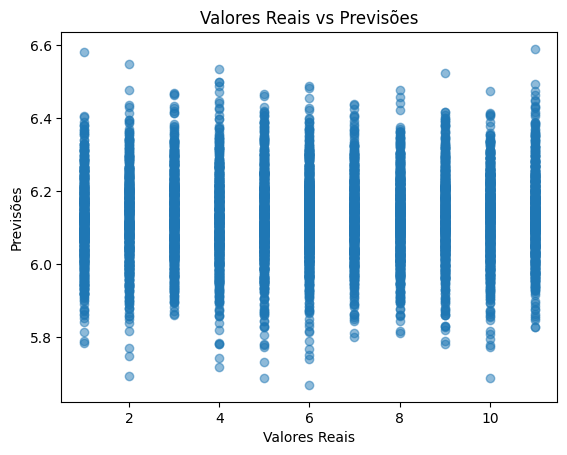

In [ ]:
import matplotlib.pyplot as plt

# Criando um gráfico de dispersão (scatter plot)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Valores Reais vs Previsões')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()


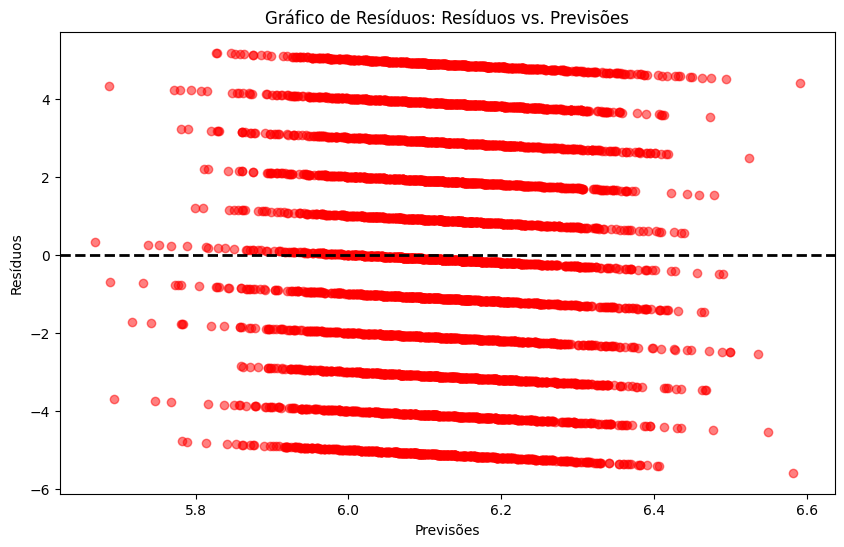

In [ ]:
residuals = y_test - y_pred

# Criar um gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red', alpha=0.5)
plt.title('Gráfico de Resíduos: Resíduos vs. Previsões')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.show()


In [ ]:
# Separar recursos (X) e rótulos (y)
# Separar recursos (X) e rótulos (y)
X1 = data[['odd_eentrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Crie uma instância do GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Execute a pesquisa de grade no conjunto de treinamento
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

# Calcular o F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo: {f1}')

Acurácia do modelo: 0.1071334214002642
F1-Score do modelo: 0.07786632760725


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_eentrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)


# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(12, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=250, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {test_accuracy}')


# Fazer previsões
predictions = model.predict(X_test)

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')


Epoch 1/250
426/426 [==============================] - 4s 5ms/step - loss: 2.4282 - accuracy: 0.0984 - val_loss: 2.3996 - val_accuracy: 0.1057
Epoch 2/250
426/426 [==============================] - 2s 4ms/step - loss: 2.3989 - accuracy: 0.1066 - val_loss: 2.3974 - val_accuracy: 0.1034
Epoch 3/250
426/426 [==============================] - 1s 3ms/step - loss: 2.3936 - accuracy: 0.1069 - val_loss: 2.3931 - val_accuracy: 0.1123
Epoch 4/250
426/426 [==============================] - 1s 3ms/step - loss: 2.3921 - accuracy: 0.1097 - val_loss: 2.3924 - val_accuracy: 0.1077
Epoch 5/250
426/426 [==============================] - 2s 4ms/step - loss: 2.3892 - accuracy: 0.1148 - val_loss: 2.3921 - val_accuracy: 0.1126
Epoch 6/250
426/426 [==============================] - 2s 4ms/step - loss: 2.3894 - accuracy: 0.1115 - val_loss: 2.3955 - val_accuracy: 0.1139
Epoch 7/250
426/426 [==============================] - 1s 3ms/step - loss: 2.3871 - accuracy: 0.1147 - val_loss: 2.3927 - val_accuracy: 0.1143

In [ ]:
# Excluir a primeira coluna
data2 = data.iloc[:, 1:]

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import numpy as np

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_eentrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(24, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

# Experimente diferentes funções de ativação, taxa de aprendizado e otimizador
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Aumente o número de épocas
model.fit(X_train, y_train, epochs=250, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {test_accuracy}')

# Fazer previsões
predictions = model.predict(X_test)

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')


Epoch 1/250
426/426 [==============================] - 4s 7ms/step - loss: 2.4609 - accuracy: 0.0977 - val_loss: 2.3976 - val_accuracy: 0.1110
Epoch 2/250
426/426 [==============================] - 2s 6ms/step - loss: 2.4019 - accuracy: 0.1031 - val_loss: 2.3978 - val_accuracy: 0.1011
Epoch 3/250
426/426 [==============================] - 3s 6ms/step - loss: 2.3961 - accuracy: 0.1095 - val_loss: 2.3947 - val_accuracy: 0.1113
Epoch 4/250
426/426 [==============================] - 3s 8ms/step - loss: 2.3937 - accuracy: 0.1121 - val_loss: 2.3943 - val_accuracy: 0.1136
Epoch 5/250
426/426 [==============================] - 2s 5ms/step - loss: 2.3918 - accuracy: 0.1093 - val_loss: 2.3971 - val_accuracy: 0.0921
Epoch 6/250
426/426 [==============================] - 2s 4ms/step - loss: 2.3888 - accuracy: 0.1126 - val_loss: 2.3998 - val_accuracy: 0.1090
Epoch 7/250
426/426 [==============================] - 2s 4ms/step - loss: 2.3870 - accuracy: 0.1138 - val_loss: 2.3974 - val_accuracy: 0.1120

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import numpy as np
from keras.optimizers import Nadam

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)

model = keras.Sequential([
    keras.layers.Dense(160, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(320, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(480, activation='relu'),
    keras.layers.Dense(640, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

# Experimente diferentes funções de ativação, taxa de aprendizado e otimizador
model.compile(optimizer=nadam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Aumente o número de épocas
model.fit(X_train, y_train, epochs=250, batch_size=160, validation_split=0.001, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {test_accuracy}')

# Fazer previsões
predictions = model.predict(X_test)

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')


Epoch 1/250
1249/1249 [==============================] - 15s 10ms/step - loss: 2.4291 - accuracy: 0.1008 - val_loss: 2.3769 - val_accuracy: 0.1200
Epoch 2/250
1249/1249 [==============================] - 13s 10ms/step - loss: 2.3912 - accuracy: 0.1046 - val_loss: 2.3644 - val_accuracy: 0.1050
Epoch 3/250
1249/1249 [==============================] - 12s 10ms/step - loss: 2.3885 - accuracy: 0.1063 - val_loss: 2.3653 - val_accuracy: 0.1300
Epoch 4/250
1249/1249 [==============================] - 13s 10ms/step - loss: 2.3870 - accuracy: 0.1072 - val_loss: 2.3682 - val_accuracy: 0.1000
Epoch 5/250
1249/1249 [==============================] - 13s 10ms/step - loss: 2.3860 - accuracy: 0.1091 - val_loss: 2.3692 - val_accuracy: 0.1050
Epoch 6/250
1249/1249 [==============================] - 12s 10ms/step - loss: 2.3855 - accuracy: 0.1088 - val_loss: 2.3706 - val_accuracy: 0.1050
Epoch 7/250
1249/1249 [==============================] - 13s 10ms/step - loss: 2.3850 - accuracy: 0.1097 - val_loss: 2